In [1]:
# import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing

In [2]:
# read the CSV file
df = pd.read_csv(r'C:\Users\Saemi\OneDrive\Education\WGU\D208 Predictive Modeling (Python & R)\PA1 - Linear Regression Modeling\medical_clean.csv')
# check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# visually inspect the dataframe. Explorate the data and spot the problems
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [5]:
df['Income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

In [6]:
df['Gender'].value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [7]:
df['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [8]:
df['Doc_visits'].value_counts()

Doc_visits
5    3823
6    2436
4    2385
7     634
3     595
8      61
2      58
1       6
9       2
Name: count, dtype: int64

In [9]:
df['Initial_admin'].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [10]:
df['HighBlood'].value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [11]:
df['Stroke'].value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [12]:
df['Complication_risk'].value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [13]:
df['Overweight'].value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [14]:
df['Arthritis'].value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [15]:
df['Diabetes'].value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [16]:
df['Hyperlipidemia'].value_counts()

Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [17]:
df['BackPain'].value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [18]:
df['Services'].value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [19]:
df['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [20]:
df['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [21]:
search_cols = ['Age', 'Income', 'Gender', 'VitD_levels', 'Doc_visits', 'Initial_admin', 'HighBlood', 'Stroke', 
               'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 
               'Services', 'TotalCharge', 'Initial_days']
medical_search = df[search_cols]
medical_search.head()

,Age,Income,Gender,VitD_levels,Doc_visits,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Services,TotalCharge,Initial_days
0,53,86575.93,Male,19.141466,6,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Blood Work,3726.702860,10.585770
1,51,46805.99,Female,18.940352,4,Emergency Admission,Yes,No,High,Yes,No,No,No,No,Intravenous,4193.190458,15.129562
2,53,14370.14,Female,18.057507,4,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,Blood Work,2434.234222,4.772177
3,78,39741.49,Male,16.576858,4,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,Blood Work,2127.830423,1.714879
4,22,1209.56,Female,17.439069,5,Elective Admission,No,No,Low,No,No,No,Yes,No,CT Scan,2113.073274,1.254807


C:\Users\Saemi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saemi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saemi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saemi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

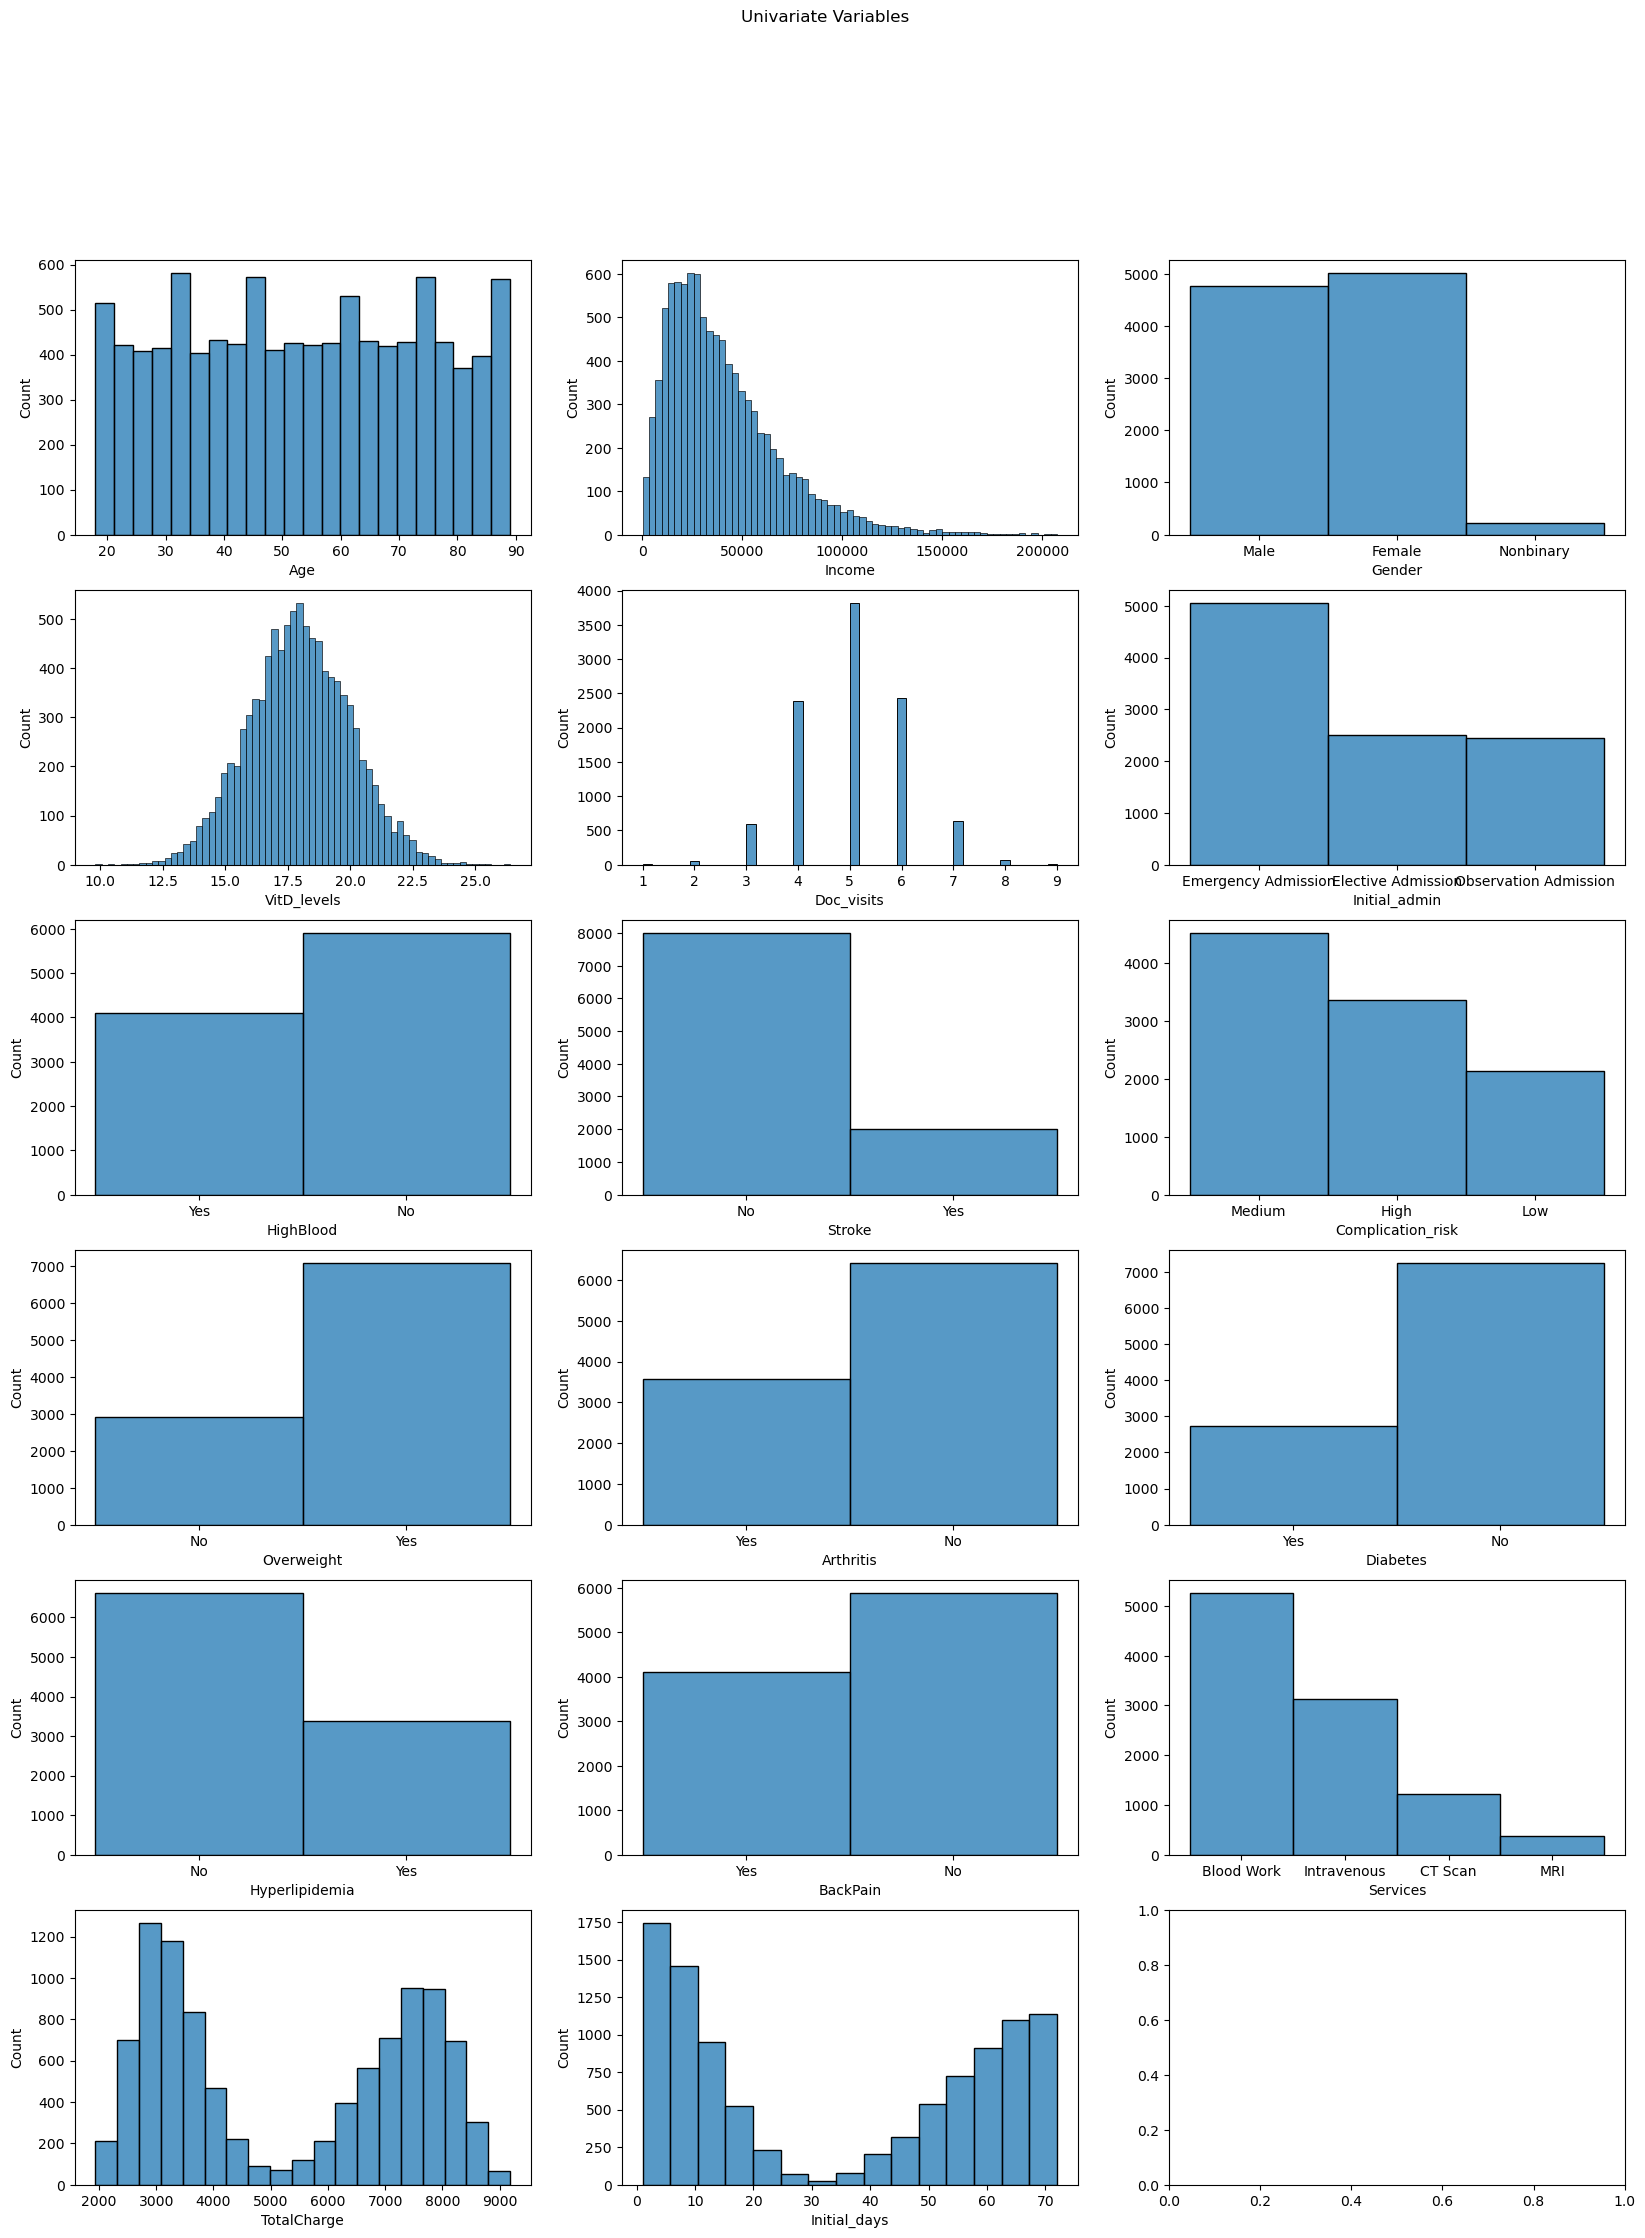

In [22]:
fig_rows, fig_cols = (6, 3)
fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(20,25))

i = 0
for row in range(fig_rows):
    for col in range(fig_cols):
        try:
            sns.histplot(data=medical_search, x=search_cols[i], ax=axes[row][col])
            #ax=axes[row][col].set_title(search_cols[i])
            i += 1
        except IndexError:
            break
            
plt.suptitle("Univariate Variables")
plt.show()

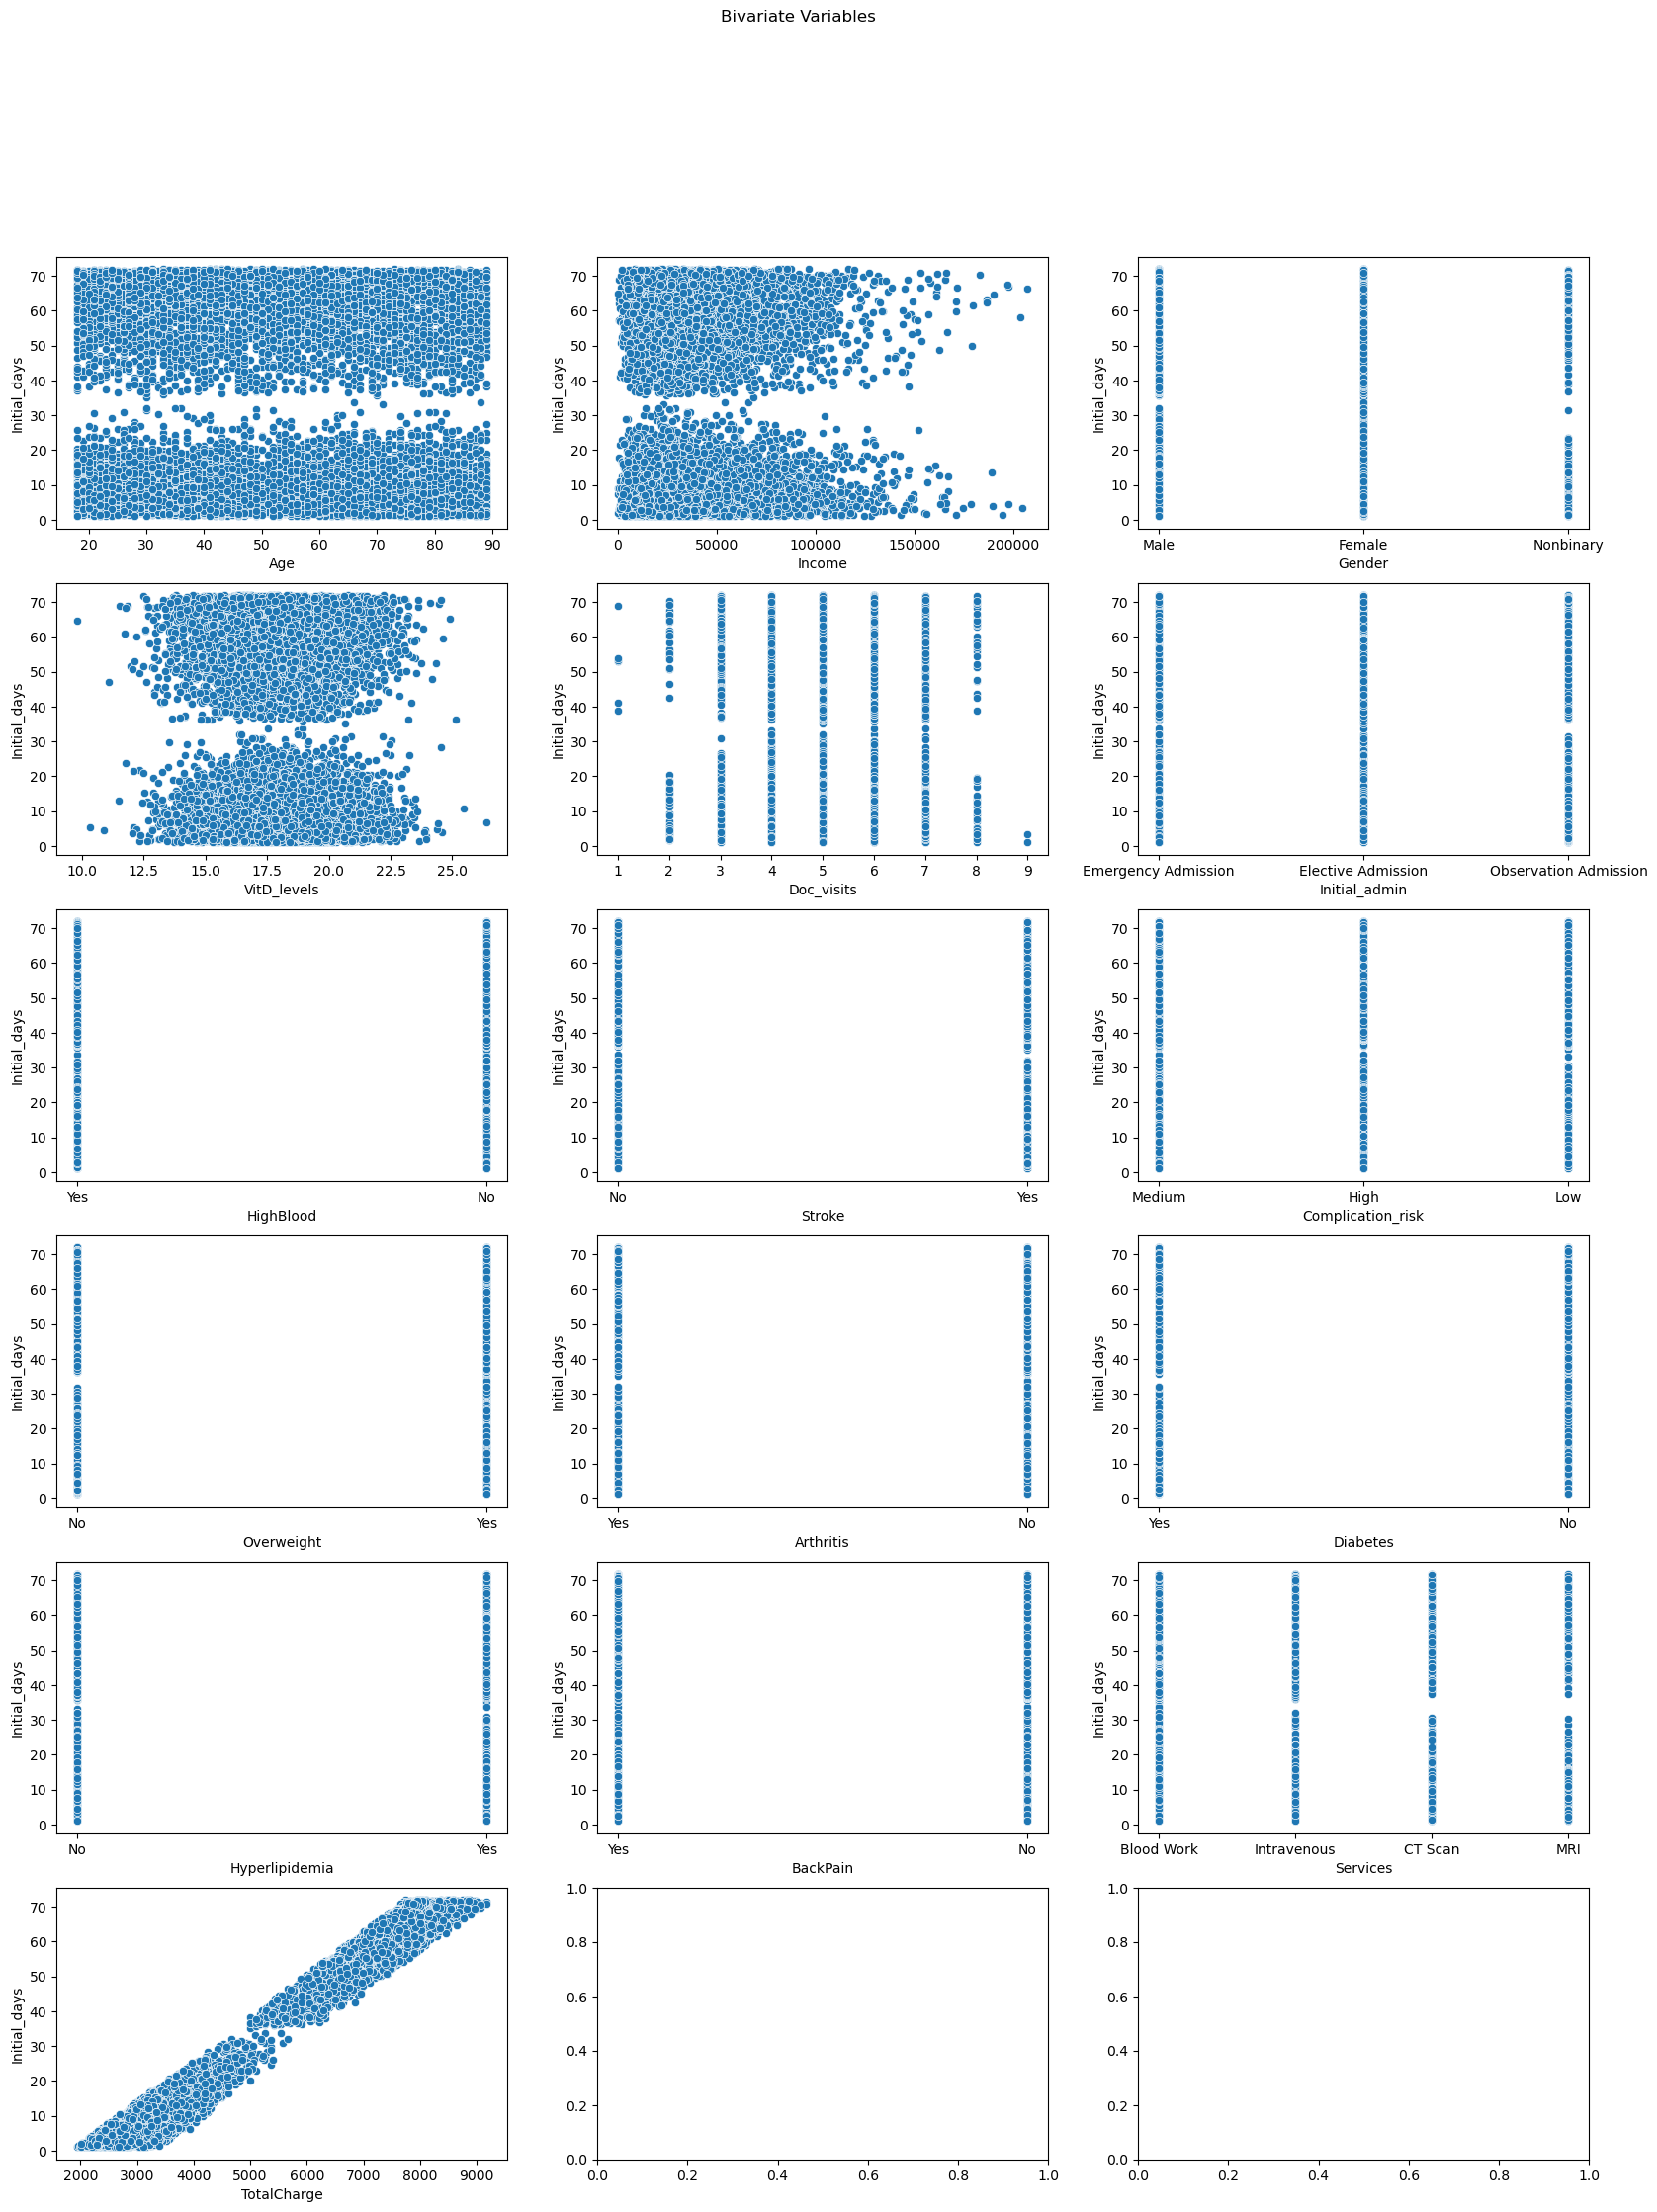

In [23]:
fig_rows, fig_cols = (6, 3)
fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(20,25))
search_cols.remove('Initial_days')

i = 0
for row in range(fig_rows):
    for col in range(fig_cols):
        try:
            sns.scatterplot(data=medical_search, x=search_cols[i], y='Initial_days', ax=axes[row][col])
            i += 1
        except IndexError:
            break
            
plt.suptitle("Bivariate Variables")
plt.show()

In [24]:
#one-hot encoding for categorical columns
initial_model = pd.get_dummies(medical_search, drop_first=True) #(Arham)
# medical_one_hot.info()
initial_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   Income                               10000 non-null  float64
 2   VitD_levels                          10000 non-null  float64
 3   Doc_visits                           10000 non-null  int64  
 4   TotalCharge                          10000 non-null  float64
 5   Initial_days                         10000 non-null  float64
 6   Gender_Male                          10000 non-null  bool   
 7   Gender_Nonbinary                     10000 non-null  bool   
 8   Initial_admin_Emergency Admission    10000 non-null  bool   
 9   Initial_admin_Observation Admission  10000 non-null  bool   
 10  HighBlood_Yes                        10000 non-null  bool   
 11  Stroke_Yes                   

In [25]:
print(initial_model.columns)

Index(['Age', 'Income', 'VitD_levels', 'Doc_visits', 'TotalCharge',
       'Initial_days', 'Gender_Male', 'Gender_Nonbinary',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'HighBlood_Yes', 'Stroke_Yes',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_Yes',
       'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes',
       'Services_CT Scan', 'Services_Intravenous', 'Services_MRI'],
      dtype='object')


In [26]:
# update the invalid column names
initial_model.rename(columns={'Marital_Never Married':'Marital_Never_Married',
                              'Initial_admin_Emergency Admission':'Initial_admin_Emergency_Admission',
                              'Initial_admin_Observation Admission':'Initial_admin_Observation_Admission',
                              'Services_CT Scan':'Services_CT_Scan'}, inplace=True)
print(initial_model.columns)

Index(['Age', 'Income', 'VitD_levels', 'Doc_visits', 'TotalCharge',
       'Initial_days', 'Gender_Male', 'Gender_Nonbinary',
       'Initial_admin_Emergency_Admission',
       'Initial_admin_Observation_Admission', 'HighBlood_Yes', 'Stroke_Yes',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_Yes',
       'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes',
       'Services_CT_Scan', 'Services_Intravenous', 'Services_MRI'],
      dtype='object')


In [27]:
initial_model.to_csv('medical_one_hot_copy.csv')

In [28]:
# make the column names into list
initial_cols = initial_model.columns.values.tolist()

initial_cols

['Age',
 'Income',
 'VitD_levels',
 'Doc_visits',
 'TotalCharge',
 'Initial_days',
 'Gender_Male',
 'Gender_Nonbinary',
 'Initial_admin_Emergency_Admission',
 'Initial_admin_Observation_Admission',
 'HighBlood_Yes',
 'Stroke_Yes',
 'Complication_risk_Low',
 'Complication_risk_Medium',
 'Overweight_Yes',
 'Arthritis_Yes',
 'Diabetes_Yes',
 'Hyperlipidemia_Yes',
 'BackPain_Yes',
 'Services_CT_Scan',
 'Services_Intravenous',
 'Services_MRI']

In [29]:
# check the data types in medical_one_hot dataset
initial_model.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('bool')], dtype=object)

In [30]:
# check the columns that are not float64
not_float = ['int64', 'bool']
not_float_cols = list(initial_model.select_dtypes(include=not_float))
not_float_cols

['Age',
 'Doc_visits',
 'Gender_Male',
 'Gender_Nonbinary',
 'Initial_admin_Emergency_Admission',
 'Initial_admin_Observation_Admission',
 'HighBlood_Yes',
 'Stroke_Yes',
 'Complication_risk_Low',
 'Complication_risk_Medium',
 'Overweight_Yes',
 'Arthritis_Yes',
 'Diabetes_Yes',
 'Hyperlipidemia_Yes',
 'BackPain_Yes',
 'Services_CT_Scan',
 'Services_Intravenous',
 'Services_MRI']

In [31]:
# update the data type from int & bool to float64

for col in not_float_cols:
    initial_model[col] = initial_model[col].astype(dtype='float64')
    
initial_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  float64
 1   Income                               10000 non-null  float64
 2   VitD_levels                          10000 non-null  float64
 3   Doc_visits                           10000 non-null  float64
 4   TotalCharge                          10000 non-null  float64
 5   Initial_days                         10000 non-null  float64
 6   Gender_Male                          10000 non-null  float64
 7   Gender_Nonbinary                     10000 non-null  float64
 8   Initial_admin_Emergency_Admission    10000 non-null  float64
 9   Initial_admin_Observation_Admission  10000 non-null  float64
 10  HighBlood_Yes                        10000 non-null  float64
 11  Stroke_Yes                   

In [32]:
#create dependent & independent variables
independent_cols = initial_model.columns
independent_cols = independent_cols.drop('Initial_days')

variables = "".join([f"{col} + "for col in independent_cols])[:-3]
variables_form = 'Initial_days ~ ' + variables

model = smf.ols(formula=variables_form, data=initial_model)
initial_result = model.fit()
print(initial_result.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.639e+05
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:49:29   Log-Likelihood:                -10673.
No. Observations:               10000   AIC:                         2.139e+04
Df Residuals:                    9978   BIC:                         2.155e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [33]:
# initial model's residual standard error
X = initial_model[independent_cols]
initial_result.resid.std(ddof=X.shape[1])

0.7042834021415536

In [34]:
# Use VIF to check for any multicollinearity when VIF > 10
reduced_model = initial_model

# VIF dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

# calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                                feature        VIF
0                                   Age   7.377854
1                                Income   2.965157
2                           VitD_levels  31.524997
3                            Doc_visits  19.983373
4                           TotalCharge   6.771369
5                           Gender_Male   1.933376
6                      Gender_Nonbinary   1.044347
7     Initial_admin_Emergency_Admission   3.017000
8   Initial_admin_Observation_Admission   1.953299
9                         HighBlood_Yes   1.691203
10                           Stroke_Yes   1.248698
11                Complication_risk_Low   1.620047
12             Complication_risk_Medium   2.329207
13                       Overweight_Yes   3.391155
14                        Arthritis_Yes   1.556082
15                         Diabetes_Yes   1.374349
16                   Hyperlipidemia_Yes   1.504197
17                         BackPain_Yes   1.699353
18                     Services

In [35]:
# remove columns that the VIF > 10 one by one
independent_cols = independent_cols.drop('VitD_levels')

X = reduced_model[independent_cols]

# VIF dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

# calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                                feature        VIF
0                                   Age   6.743190
1                                Income   2.896002
2                            Doc_visits  13.285525
3                           TotalCharge   6.279366
4                           Gender_Male   1.909125
5                      Gender_Nonbinary   1.043203
6     Initial_admin_Emergency_Admission   2.930641
7   Initial_admin_Observation_Admission   1.912205
8                         HighBlood_Yes   1.680933
9                            Stroke_Yes   1.243947
10                Complication_risk_Low   1.591315
11             Complication_risk_Medium   2.260766
12                       Overweight_Yes   3.284820
13                        Arthritis_Yes   1.548716
14                         Diabetes_Yes   1.371916
15                   Hyperlipidemia_Yes   1.495557
16                         BackPain_Yes   1.692657
17                     Services_CT_Scan   1.228271
18                 Services_Int

In [36]:
# remove columns that the VIF > 10 one by one
independent_cols = independent_cols.drop('Doc_visits')

X = reduced_model[independent_cols]

# VIF dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

# calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                                feature       VIF
0                                   Age  5.887371
1                                Income  2.772539
2                           TotalCharge  5.653127
3                           Gender_Male  1.876099
4                      Gender_Nonbinary  1.042176
5     Initial_admin_Emergency_Admission  2.808970
6   Initial_admin_Observation_Admission  1.837537
7                         HighBlood_Yes  1.664859
8                            Stroke_Yes  1.239157
9                 Complication_risk_Low  1.558977
10             Complication_risk_Medium  2.189475
11                       Overweight_Yes  3.130006
12                        Arthritis_Yes  1.539074
13                         Diabetes_Yes  1.361814
14                   Hyperlipidemia_Yes  1.490221
15                         BackPain_Yes  1.678805
16                     Services_CT_Scan  1.220292
17                 Services_Intravenous  1.553291
18                         Services_MRI  1.070340


In [37]:
# normalize the values based upon the min & max
reduced_model_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(initial_model), columns=initial_model.columns)
reduced_model_minmax.head() #(Keith)

,Age,Income,VitD_levels,Doc_visits,TotalCharge,Initial_days,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,...,Complication_risk_Low,Complication_risk_Medium,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Services_CT_Scan,Services_Intravenous,Services_MRI
0,0.492958,0.417305,0.562756,0.625,0.246933,0.135022,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.464789,0.225268,0.550632,0.375,0.311343,0.199037,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.492958,0.068645,0.497410,0.375,0.068475,0.053117,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.845070,0.191156,0.408150,0.375,0.026168,0.010044,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.056338,0.005097,0.460128,0.500,0.024130,0.003562,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [38]:
#create dependent & independent variables

variables = "".join([f"{col} + "for col in independent_cols])[:-3]
variables_form = 'Initial_days ~ ' + variables

model = smf.ols(formula=variables_form, data=reduced_model_minmax)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.339e+05
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:49:30   Log-Likelihood:                 31951.
No. Observations:               10000   AIC:                        -6.386e+04
Df Residuals:                    9980   BIC:                        -6.372e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [39]:
# remove Age with p-value = 0.918
independent_cols = independent_cols.drop('Age')

variables = "".join([f"{col} + "for col in independent_cols])[:-3]
variables_form = 'Initial_days ~ ' + variables

model = smf.ols(formula=variables_form, data=reduced_model_minmax)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.748e+05
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:49:30   Log-Likelihood:                 31951.
No. Observations:               10000   AIC:                        -6.386e+04
Df Residuals:                    9981   BIC:                        -6.373e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [40]:
# remove Services_MRI with p-value = 0.629
independent_cols = independent_cols.drop('Services_MRI')

variables = "".join([f"{col} + "for col in independent_cols])[:-3]
variables_form = 'Initial_days ~ ' + variables

model = smf.ols(formula=variables_form, data=reduced_model_minmax)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.204e+05
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:49:30   Log-Likelihood:                 31951.
No. Observations:               10000   AIC:                        -6.387e+04
Df Residuals:                    9982   BIC:                        -6.374e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [41]:
# remove Services_Intravenous with p-value = 0.575
independent_cols = independent_cols.drop('Services_Intravenous')

variables = "".join([f"{col} + "for col in independent_cols])[:-3]
variables_form = 'Initial_days ~ ' + variables

model = smf.ols(formula=variables_form, data=reduced_model_minmax)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.717e+05
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:49:30   Log-Likelihood:                 31950.
No. Observations:               10000   AIC:                        -6.387e+04
Df Residuals:                    9983   BIC:                        -6.374e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [42]:
# remove Services_CT_Scan with p-value = 0.450
independent_cols = independent_cols.drop('Services_CT_Scan')

variables = "".join([f"{col} + "for col in independent_cols])[:-3]
variables_form = 'Initial_days ~ ' + variables

model = smf.ols(formula=variables_form, data=reduced_model_minmax)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.299e+05
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:49:30   Log-Likelihood:                 31950.
No. Observations:               10000   AIC:                        -6.387e+04
Df Residuals:                    9984   BIC:                        -6.375e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [43]:
# remove Income with p-value = 0.417
independent_cols = independent_cols.drop('Income')

variables = "".join([f"{col} + "for col in independent_cols])[:-3]
variables_form = 'Initial_days ~ ' + variables

model = smf.ols(formula=variables_form, data=reduced_model_minmax)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.964e+05
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:49:31   Log-Likelihood:                 31950.
No. Observations:               10000   AIC:                        -6.387e+04
Df Residuals:                    9985   BIC:                        -6.376e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [44]:
# remove Gender_Nonbinary with p-value = 0.384
independent_cols = independent_cols.drop('Gender_Nonbinary')

variables = "".join([f"{col} + "for col in independent_cols])[:-3]
variables_form = 'Initial_days ~ ' + variables

model = smf.ols(formula=variables_form, data=reduced_model_minmax)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.073e+06
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:49:31   Log-Likelihood:                 31949.
No. Observations:               10000   AIC:                        -6.387e+04
Df Residuals:                    9986   BIC:                        -6.377e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [45]:
# remove Stroke_Yes with p-value = 0.231
independent_cols = independent_cols.drop('Stroke_Yes')

variables = "".join([f"{col} + "for col in independent_cols])[:-3]
variables_form = 'Initial_days ~ ' + variables

model = smf.ols(formula=variables_form, data=reduced_model_minmax)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.162e+06
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:49:31   Log-Likelihood:                 31949.
No. Observations:               10000   AIC:                        -6.387e+04
Df Residuals:                    9987   BIC:                        -6.378e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [46]:
# remove Overweight_Yes with p-value = 0.212
independent_cols = independent_cols.drop('Overweight_Yes')

variables = "".join([f"{col} + "for col in independent_cols])[:-3]
variables_form = 'Initial_days ~ ' + variables

model = smf.ols(formula=variables_form, data=reduced_model_minmax)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.268e+06
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:49:31   Log-Likelihood:                 31948.
No. Observations:               10000   AIC:                        -6.387e+04
Df Residuals:                    9988   BIC:                        -6.379e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [47]:
# remove Gender_Male with p-value = 0.165
independent_cols = independent_cols.drop('Gender_Male')

variables = "".join([f"{col} + "for col in independent_cols])[:-3]
variables_form = 'Initial_days ~ ' + variables

model = smf.ols(formula=variables_form, data=reduced_model_minmax)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.395e+06
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:49:31   Log-Likelihood:                 31947.
No. Observations:               10000   AIC:                        -6.387e+04
Df Residuals:                    9989   BIC:                        -6.379e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [48]:
# remove Initial_admin_Observation_Admission with p-value = 0.068
independent_cols = independent_cols.drop('Initial_admin_Observation_Admission')

variables = "".join([f"{col} + "for col in independent_cols])[:-3]
variables_form = 'Initial_days ~ ' + variables

model = smf.ols(formula=variables_form, data=reduced_model_minmax)
reduced_result = model.fit()
print(reduced_result.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.549e+06
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:49:31   Log-Likelihood:                 31945.
No. Observations:               10000   AIC:                        -6.387e+04
Df Residuals:                    9990   BIC:                        -6.380e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [49]:
# reduced model's residual standard error
X2 = reduced_model_minmax[independent_cols]
reduced_result.resid.std(ddof=X2.shape[1])

0.009921879342709597

C:\Users\Saemi\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


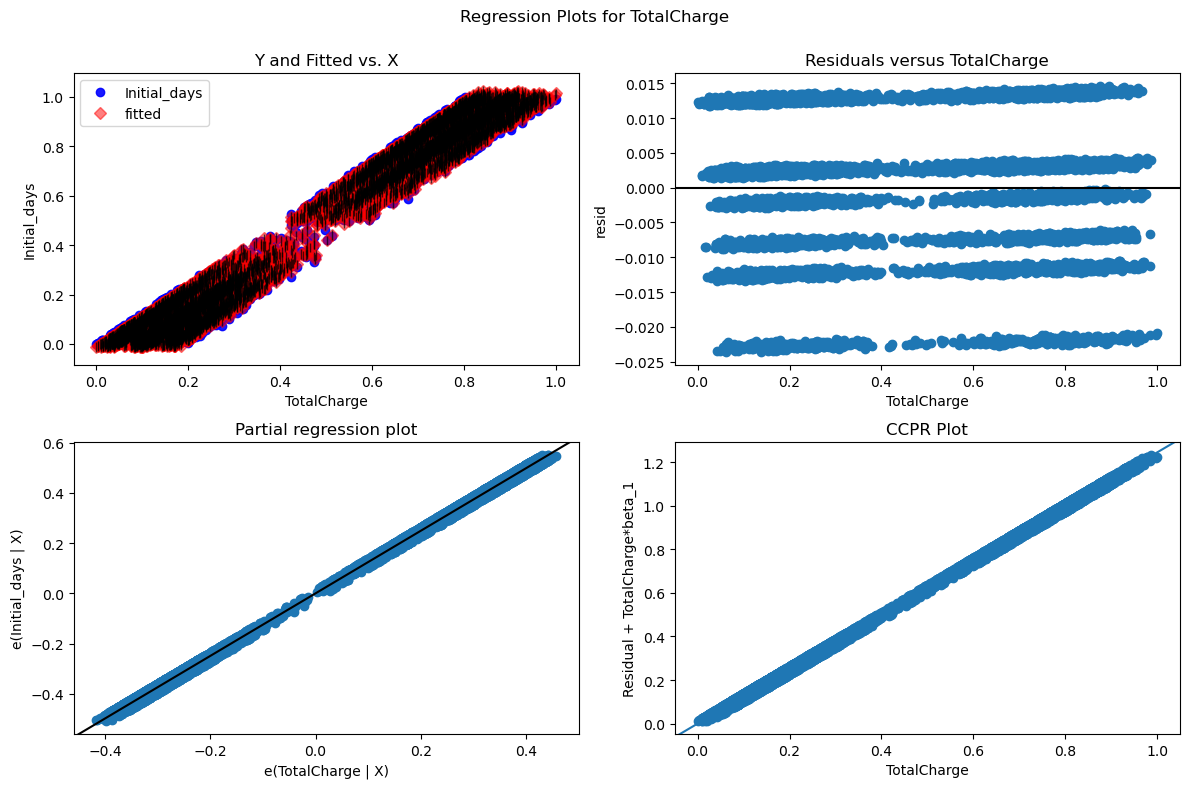

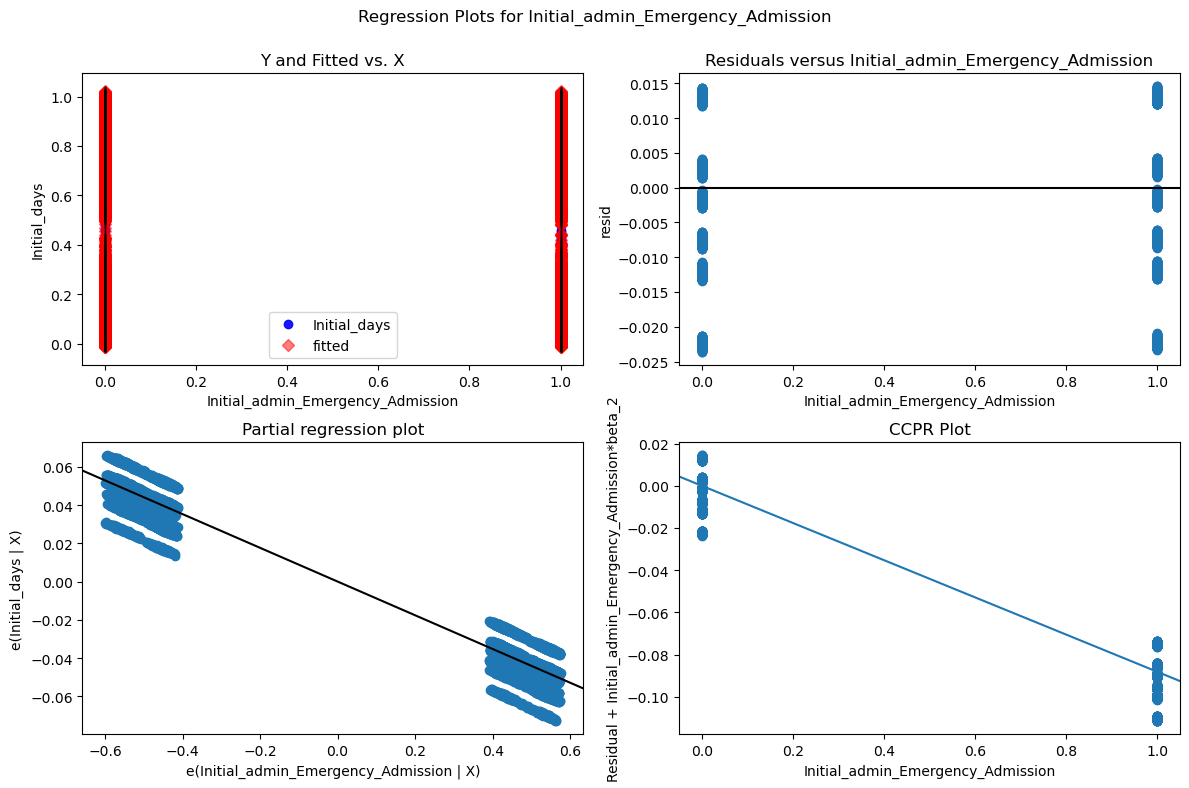

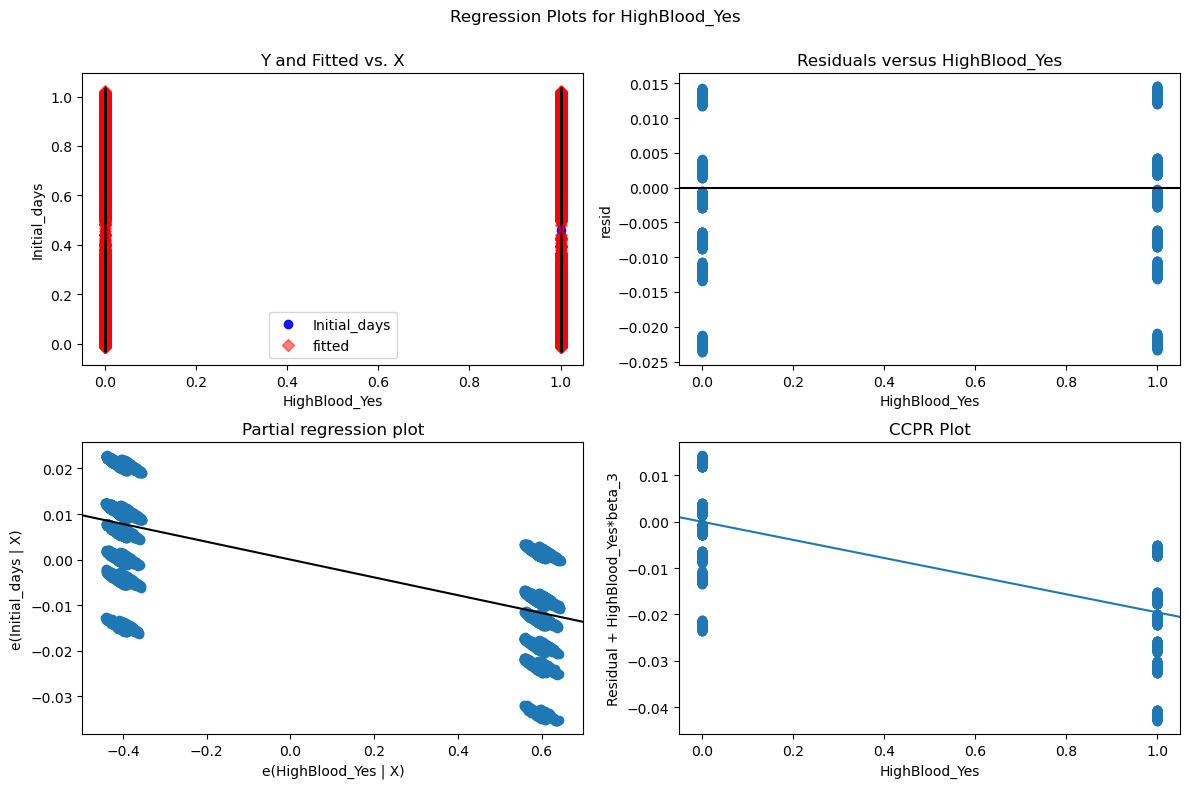

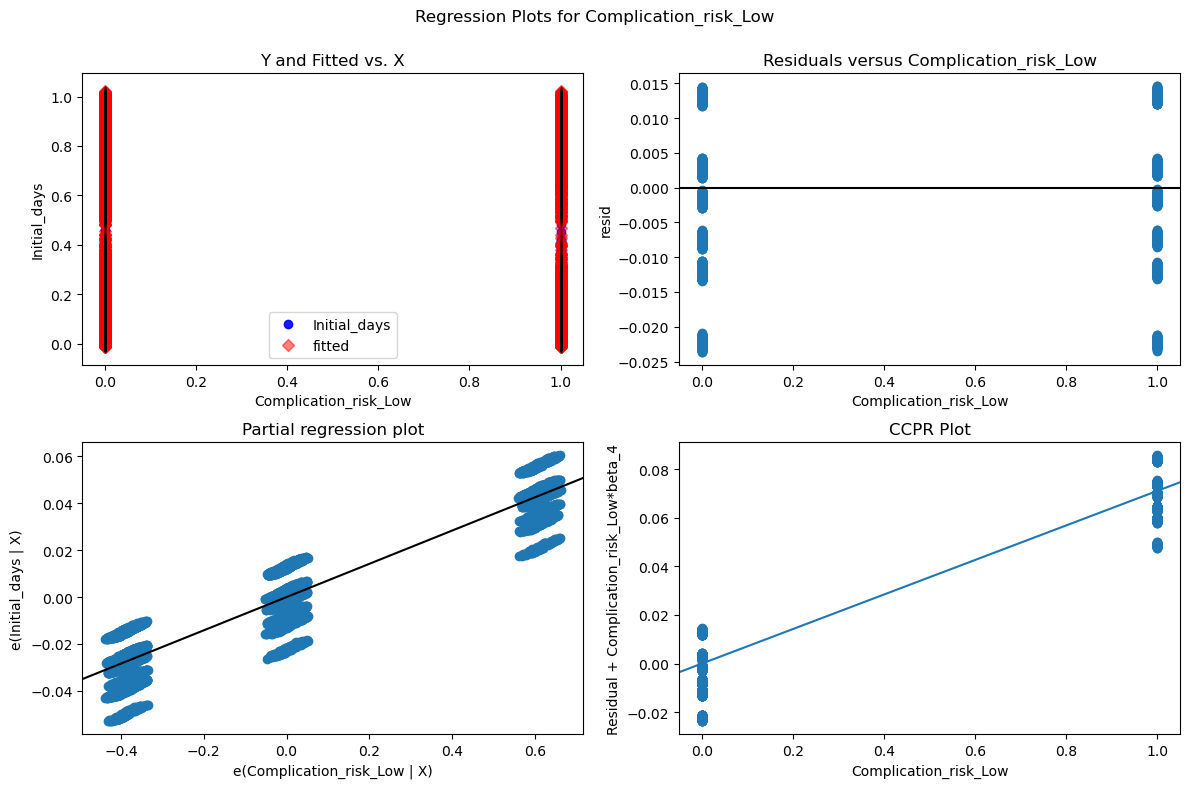

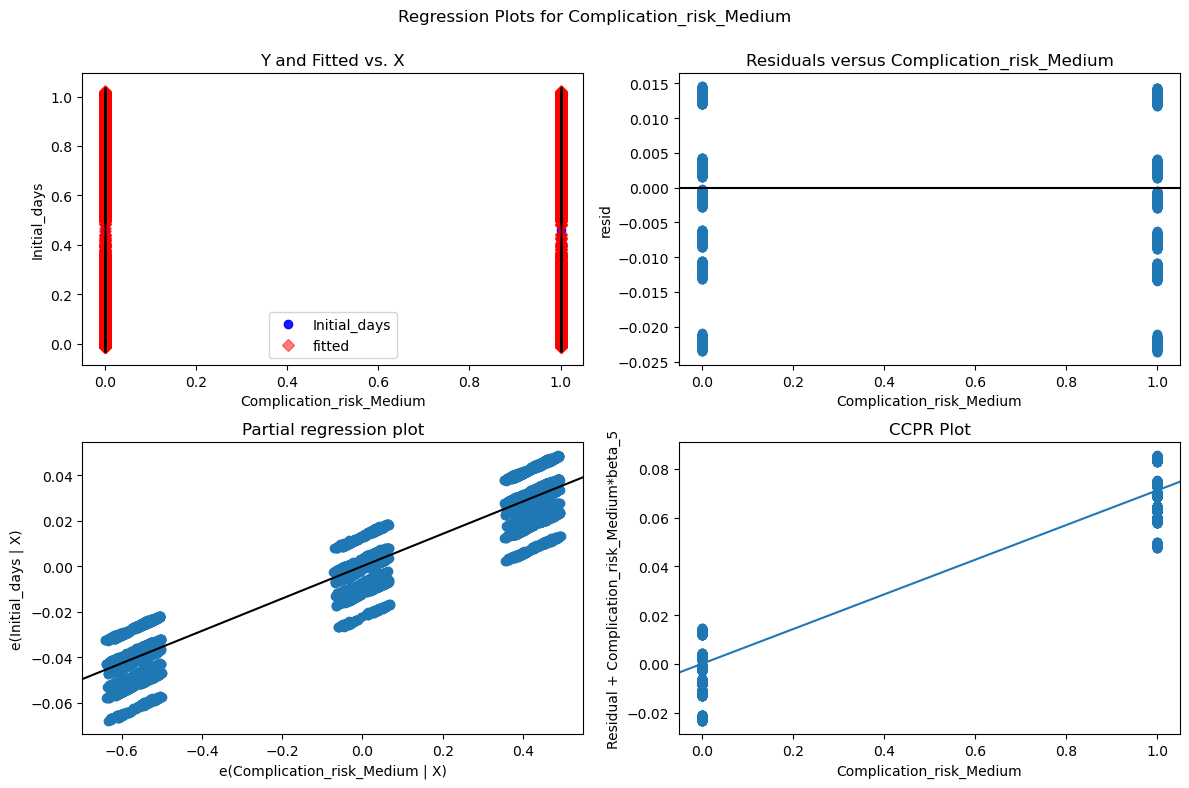

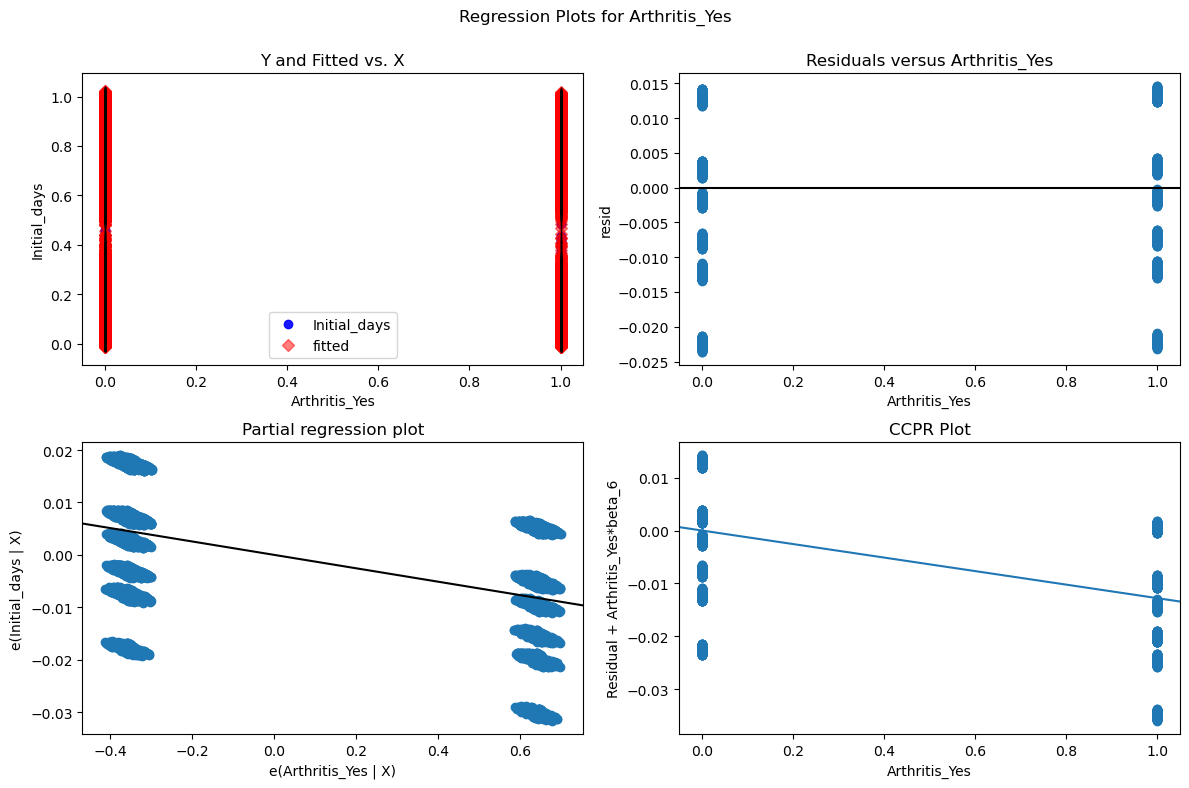

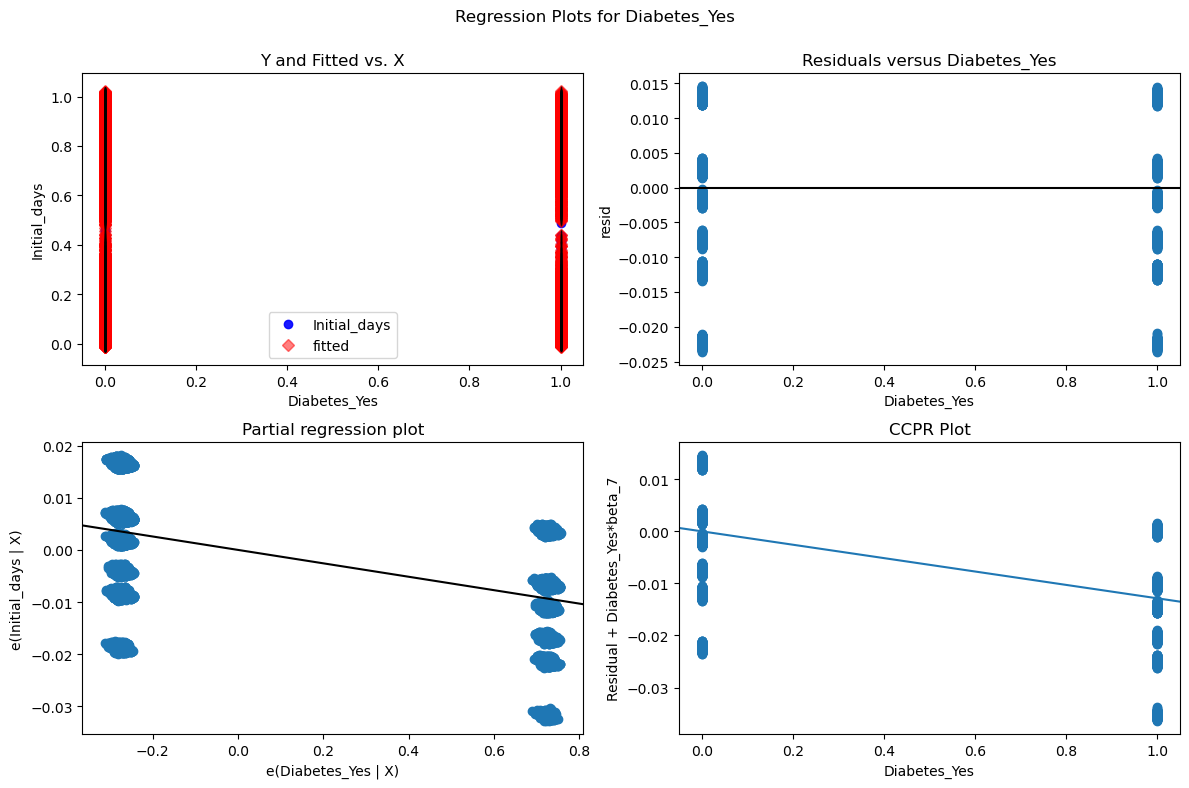

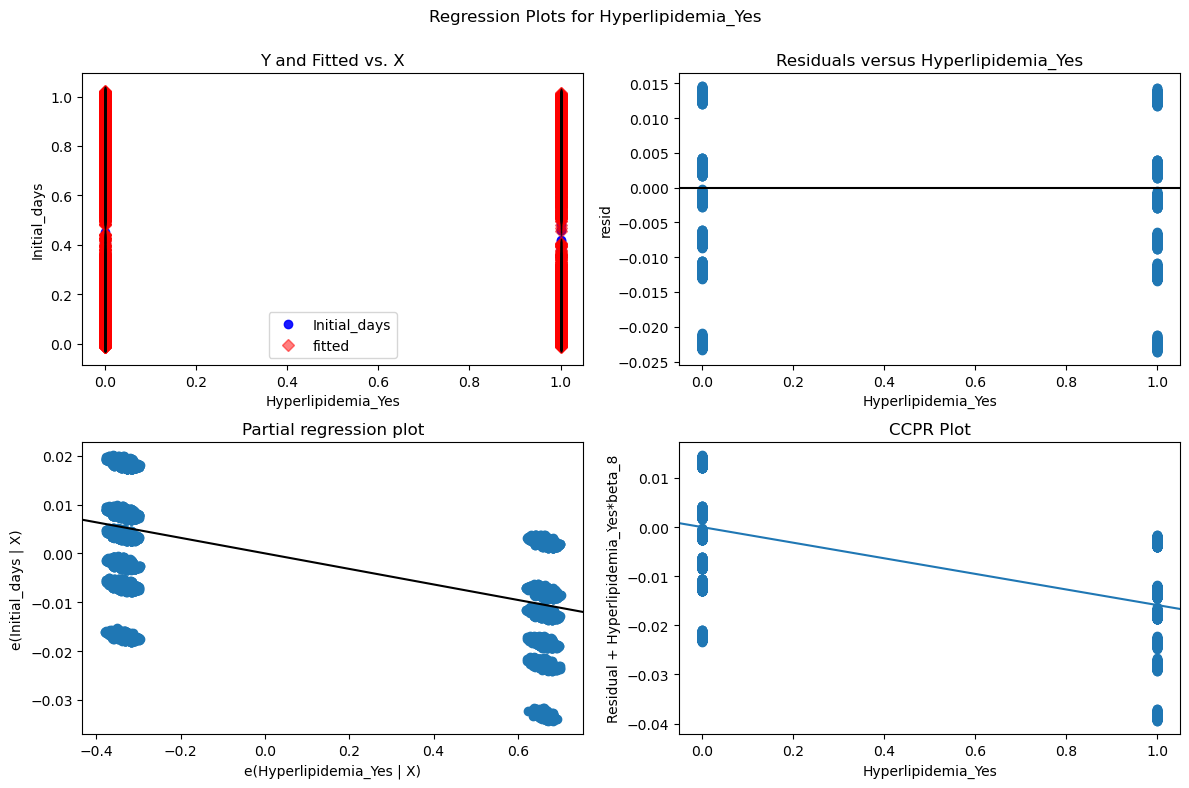

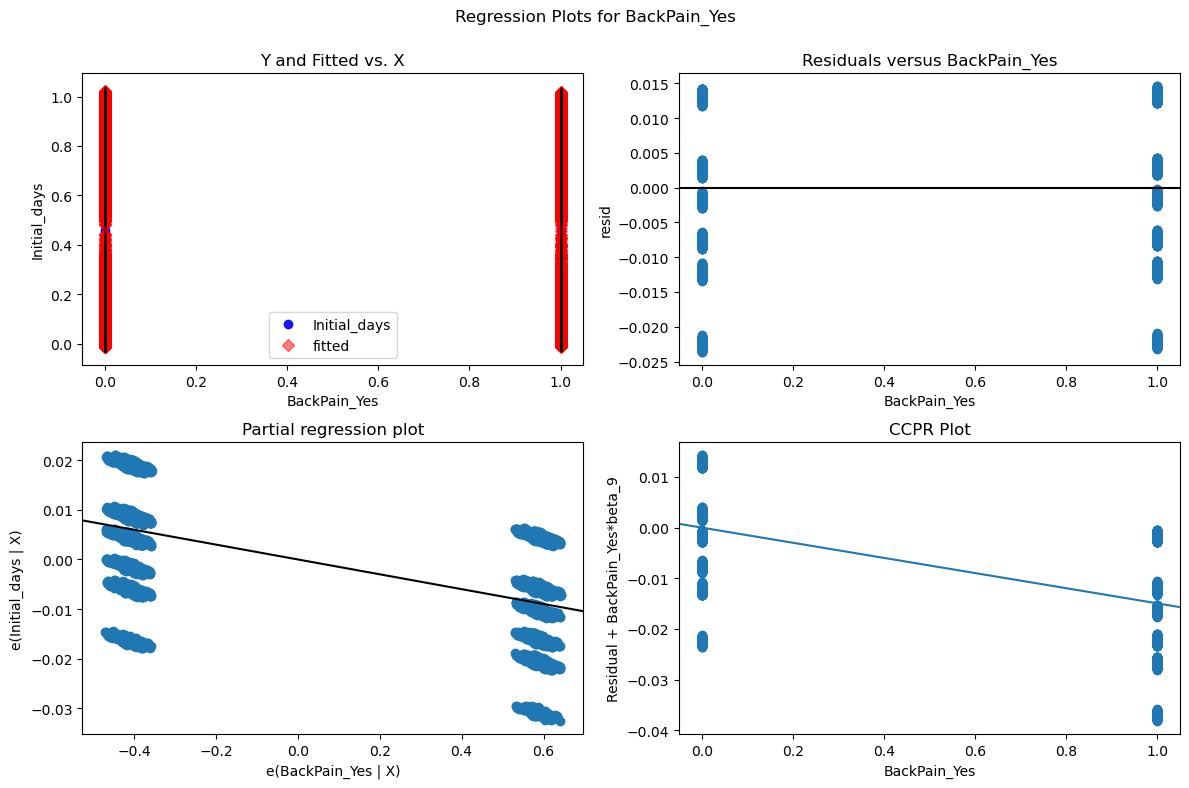

In [50]:
# residual plots for all the variables in the reduced linear regression model
for col in independent_cols:
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(reduced_result, col, fig=fig)